<a href="https://colab.research.google.com/github/Ankushkr14/NAFLD/blob/main/NAFLD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
df1 = pd.read_csv('/content/nafld1.csv')
df2 = pd.read_csv('/content/nafld2.csv')
df = pd.merge(df1, df2, on='id', how='inner')

In [ ]:
df.head(10)

,Unnamed: 0_x,id,age,male,weight,height,bmi,case.id,futime,status,Unnamed: 0_y,days,test,value
0,3631,1,57,0,60.0,163.0,22.690939,10630.0,6261,0,135077,-459,hdl,75.0
1,3631,1,57,0,60.0,163.0,22.690939,10630.0,6261,0,313143,-459,chol,75.0
2,3631,1,57,0,60.0,163.0,22.690939,10630.0,6261,0,135078,183,hdl,64.0
3,3631,1,57,0,60.0,163.0,22.690939,10630.0,6261,0,313144,183,chol,64.0
4,3631,1,57,0,60.0,163.0,22.690939,10630.0,6261,0,135079,2030,hdl,74.0
5,3631,1,57,0,60.0,163.0,22.690939,10630.0,6261,0,313145,2030,chol,74.0
6,3631,1,57,0,60.0,163.0,22.690939,10630.0,6261,0,135080,3578,hdl,50.0
7,3631,1,57,0,60.0,163.0,22.690939,10630.0,6261,0,313146,3578,chol,50.0
8,3631,1,57,0,60.0,163.0,22.690939,10630.0,6261,0,135081,5420,hdl,79.0
9,3631,1,57,0,60.0,163.0,22.690939,10630.0,6261,0,313147,5420,chol,79.0


In [ ]:
df.drop('Unnamed: 0_x', axis=1, inplace=True)

In [ ]:
df.drop('Unnamed: 0_y', axis=1, inplace=True)

In [ ]:
df.drop('case.id', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400123 entries, 0 to 400122
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      400123 non-null  int64  
 1   age     400123 non-null  int64  
 2   male    400123 non-null  int64  
 3   weight  344669 non-null  float64
 4   height  374480 non-null  float64
 5   bmi     343601 non-null  float64
 6   futime  400123 non-null  int64  
 7   status  400123 non-null  int64  
 8   days    400123 non-null  int64  
 9   test    400123 non-null  object 
 10  value   400123 non-null  float64
dtypes: float64(4), int64(6), object(1)
memory usage: 36.6+ MB


In [ ]:
df.head(20)

,id,age,male,weight,height,bmi,futime,status,days,test,value
0,1,57,0,60.0,163.0,22.690939,6261,0,-459,hdl,75.0
1,1,57,0,60.0,163.0,22.690939,6261,0,-459,chol,75.0
2,1,57,0,60.0,163.0,22.690939,6261,0,183,hdl,64.0
3,1,57,0,60.0,163.0,22.690939,6261,0,183,chol,64.0
4,1,57,0,60.0,163.0,22.690939,6261,0,2030,hdl,74.0
5,1,57,0,60.0,163.0,22.690939,6261,0,2030,chol,74.0
6,1,57,0,60.0,163.0,22.690939,6261,0,3578,hdl,50.0
7,1,57,0,60.0,163.0,22.690939,6261,0,3578,chol,50.0
8,1,57,0,60.0,163.0,22.690939,6261,0,5420,hdl,79.0
9,1,57,0,60.0,163.0,22.690939,6261,0,5420,chol,79.0


In [ ]:
df.isnull().sum()

id            0
age           0
male          0
weight    55454
height    25643
bmi       56522
futime        0
status        0
days          0
test          0
value         0
dtype: int64

In [ ]:
for col in df.columns:
  if df[col].dtypes != 'object':
    df[col].fillna(df[col].median(), inplace=True)

In [ ]:
df.isnull().sum()

id        0
age       0
male      0
weight    0
height    0
bmi       0
futime    0
status    0
days      0
test      0
value     0
dtype: int64

In [ ]:
df['test'].dtype

dtype('O')

In [ ]:
df['test'].value_counts()

hdl      161259
chol     161258
sbp       33430
dbp       33430
smoke      7008
fib4       3738
Name: test, dtype: int64

In [ ]:
dummy_df = pd.get_dummies(df['test'])

In [ ]:
dummy_df

,chol,dbp,fib4,hdl,sbp,smoke
0,0,0,0,1,0,0
1,1,0,0,0,0,0
2,0,0,0,1,0,0
3,1,0,0,0,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
400118,1,0,0,0,0,0
400119,0,0,0,1,0,0
400120,1,0,0,0,0,0
400121,0,0,0,1,0,0


In [ ]:
dummy_df['smoke'].value_counts()

NameError: name 'dummy_df' is not defined

In [ ]:
df = pd.concat([df, dummy_df], axis=1)

In [ ]:
df.head(10)

,id,age,male,weight,height,bmi,futime,status,days,test,value,chol,dbp,fib4,hdl,sbp,smoke
0,1,57,0,60.0,163.0,22.690939,6261,0,-459,hdl,75.0,0,0,0,1,0,0
1,1,57,0,60.0,163.0,22.690939,6261,0,-459,chol,75.0,1,0,0,0,0,0
2,1,57,0,60.0,163.0,22.690939,6261,0,183,hdl,64.0,0,0,0,1,0,0
3,1,57,0,60.0,163.0,22.690939,6261,0,183,chol,64.0,1,0,0,0,0,0
4,1,57,0,60.0,163.0,22.690939,6261,0,2030,hdl,74.0,0,0,0,1,0,0
5,1,57,0,60.0,163.0,22.690939,6261,0,2030,chol,74.0,1,0,0,0,0,0
6,1,57,0,60.0,163.0,22.690939,6261,0,3578,hdl,50.0,0,0,0,1,0,0
7,1,57,0,60.0,163.0,22.690939,6261,0,3578,chol,50.0,1,0,0,0,0,0
8,1,57,0,60.0,163.0,22.690939,6261,0,5420,hdl,79.0,0,0,0,1,0,0
9,1,57,0,60.0,163.0,22.690939,6261,0,5420,chol,79.0,1,0,0,0,0,0


In [ ]:
df.drop('test', axis=1, inplace=True)

In [ ]:
df.head(10)

,id,age,male,weight,height,bmi,futime,status,days,value,chol,dbp,fib4,hdl,sbp,smoke
0,1,57,0,60.0,163.0,22.690939,6261,0,-459,75.0,0,0,0,1,0,0
1,1,57,0,60.0,163.0,22.690939,6261,0,-459,75.0,1,0,0,0,0,0
2,1,57,0,60.0,163.0,22.690939,6261,0,183,64.0,0,0,0,1,0,0
3,1,57,0,60.0,163.0,22.690939,6261,0,183,64.0,1,0,0,0,0,0
4,1,57,0,60.0,163.0,22.690939,6261,0,2030,74.0,0,0,0,1,0,0
5,1,57,0,60.0,163.0,22.690939,6261,0,2030,74.0,1,0,0,0,0,0
6,1,57,0,60.0,163.0,22.690939,6261,0,3578,50.0,0,0,0,1,0,0
7,1,57,0,60.0,163.0,22.690939,6261,0,3578,50.0,1,0,0,0,0,0
8,1,57,0,60.0,163.0,22.690939,6261,0,5420,79.0,0,0,0,1,0,0
9,1,57,0,60.0,163.0,22.690939,6261,0,5420,79.0,1,0,0,0,0,0


In [ ]:
df.info()

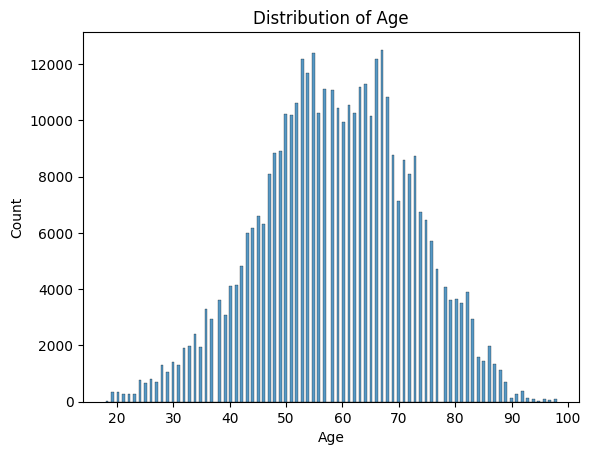

In [ ]:
sns.histplot(df['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

Text(0.5, 1.0, '0=female, 1=male')

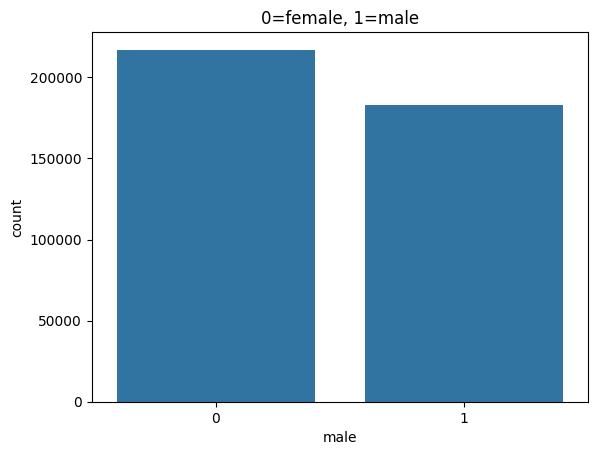

In [ ]:
countplot = sns.countplot(data=df, x="male")
plt.title("0=female, 1=male")

In [ ]:
X=df.drop("status", axis=1)
y=df["status"]

In [ ]:
X.shape

(400123, 15)

In [ ]:
y.shape

(400123,)

In [ ]:
y.value_counts()

0    356459
1     43664
Name: status, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(X, y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x_sm, y_sm, test_size=0.3, random_state=1, stratify=y_sm)

In [ ]:
y_train.value_counts()

1    249521
0    249521
Name: status, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_train

array([[-1.20149801, -0.63938442, -0.89110585, ..., -0.61600077,
        -0.25849402, -0.10496156],
       [ 1.22945322, -1.00258869, -0.89110585, ..., -0.61600077,
        -0.25849402,  9.52729765],
       [ 0.55501726, -1.58371554,  1.12220113, ...,  1.62337461,
        -0.25849402, -0.10496156],
       ...,
       [ 1.52272888,  0.9587144 ,  1.12220113, ..., -0.61600077,
        -0.25849402, -0.10496156],
       [ 1.41012672, -0.56674356,  1.12220113, ..., -0.61600077,
        -0.25849402, -0.10496156],
       [-0.47644994, -1.8016381 , -0.89110585, ..., -0.61600077,
        -0.25849402, -0.10496156]])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_leaf= 1, min_samples_split=2, random_state=1)
dt_model.fit(X_train, y_train)
print(f"Train: {dt_model.score(X_train, y_train)}")
print(f"Test: {dt_model.score(X_test, y_test)}")
y_pred=dt_model.predict(X_test)
cnf_matrix=confusion_matrix(y_test, y_pred)

Train: 1.0
Test: 0.9802736164880586


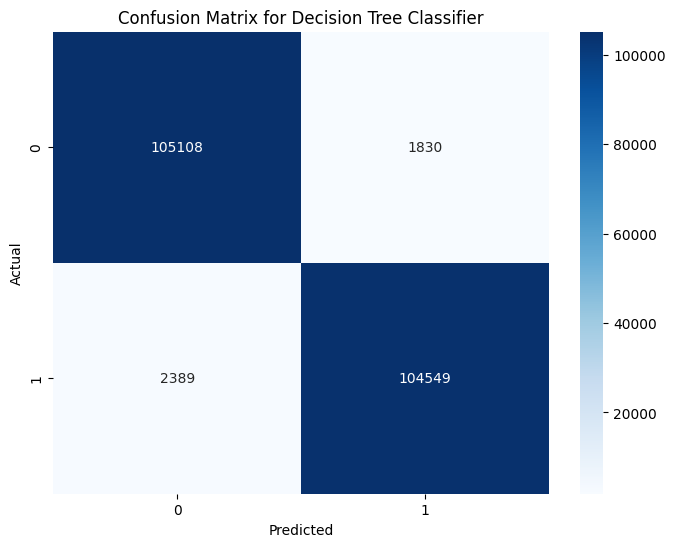

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, cmap="Blues", fmt="d")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
target_names=['Alive', 'Dead']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       Alive       0.98      0.98      0.98    106938
        Dead       0.98      0.98      0.98    106938

    accuracy                           0.98    213876
   macro avg       0.98      0.98      0.98    213876
weighted avg       0.98      0.98      0.98    213876



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

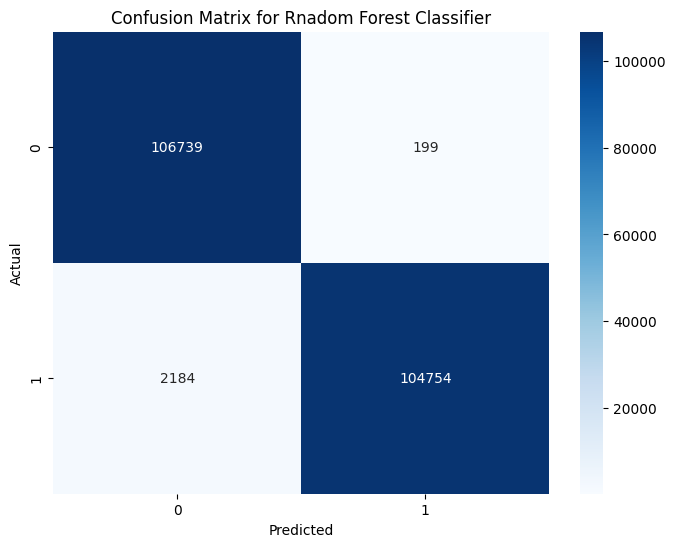

In [ ]:
cnf_matrix=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, cmap="Blues", fmt="d")
plt.title('Confusion Matrix for Rnadom Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
target_names=['Alive', 'Dead']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       Alive       0.98      1.00      0.99    106938
        Dead       1.00      0.98      0.99    106938

    accuracy                           0.99    213876
   macro avg       0.99      0.99      0.99    213876
weighted avg       0.99      0.99      0.99    213876



In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.9 MB/s eta 0:00:00


In [ ]:
from shap import TreeExplainer
explainer = TreeExplainer(rf_classifier)
shap_values = np.array(explainer.shap_values(X_train))

In [ ]:
print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test)

In [ ]:
shap.summary_plot(shap_values[1], X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

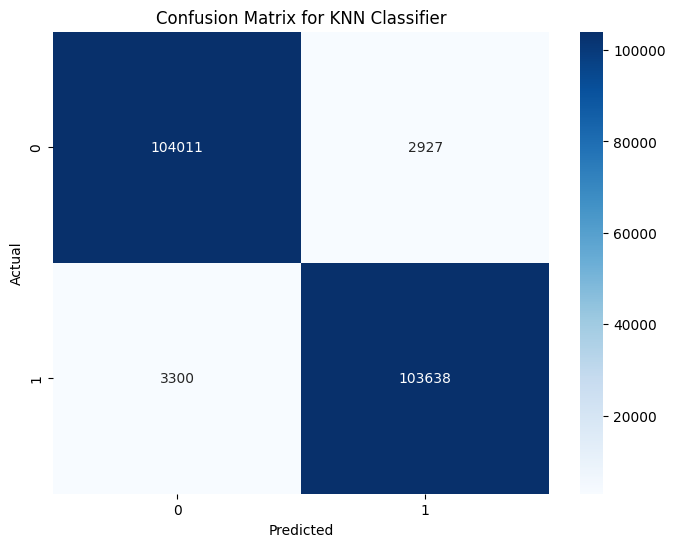

In [ ]:
cnf_matrix=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, cmap="Blues", fmt="d")
plt.title('Confusion Matrix for KNN Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
target_names=['Alive', 'Dead']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       Alive       0.97      0.97      0.97    106938
        Dead       0.97      0.97      0.97    106938

    accuracy                           0.97    213876
   macro avg       0.97      0.97      0.97    213876
weighted avg       0.97      0.97      0.97    213876



In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

In [ ]:
cnf_matrix=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, cmap="Blues", fmt="d")
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
target_names=['Alive', 'Dead']
print(classification_report(y_test, y_pred, target_names=target_names))

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg_classifier = LogisticRegression(random_state=42)
log_reg_classifier.fit(X_train, y_train)
y_pred = log_reg_classifier.predict(X_test)

In [ ]:
cnf_matrix=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, cmap="Blues", fmt="d")
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
target_names=['Alive', 'Dead']
print(classification_report(y_test, y_pred, target_names=target_names))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_recall_fscore_support
dt_base = DecisionTreeClassifier(max_depth = 5)
adaboost = AdaBoostClassifier(estimator=dt_base, n_estimators=400, learning_rate=1)
boost_model=adaboost.fit(X_train, y_train)
ada_pred=boost_model.predict(X_test)
target_names=['Alive', 'Dead']
print("train: ",boost_model.score(X_train, y_train))
print("test: ",boost_model.score(X_test, y_test))

In [ ]:
cnf_matrix=confusion_matrix(y_test, ada_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, cmap="Blues", fmt="d")
plt.title('Confusion Matrix for AdaBoost Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
target_names=['Alive', 'Dead']
print(classification_report(y_test, ada_pred, target_names=target_names))

In [ ]:
cnf_matrix=confusion_matrix(y_test, ada_pred)
TN = cnf_matrix[0, 0]
FP = cnf_matrix[0, 1]
specificity = TN / (TN + FP)
print("Specificity:", specificity)